# Image Processing and Computer Vision

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Save cascade training info.

In [50]:
stages = [1, 2, 2.5, 3]
tpr = [1, 1, 1]
fpr = [1, 0.0494658, 0.0012683]

cascade_info = np.array(([1, 2, 3], [1, 1, 1], [1, 0.0494658, 0.0012683]))

- Create dataframe for Cascade training info.

In [53]:
cols = ['Stage', 'TPR', 'FPR']
cascade_df = pd.DataFrame(cascade_info.T, columns=cols)
cascade_df['Stage'] = cascade_df['Stage'].astype('int')
# cascade_df = cascade_df.set_index('Stage')
cascade_df

,Stage,TPR,FPR
0,1,1.0,1.000000
1,2,1.0,0.049466
2,3,1.0,0.001268


Plot TPR and FPR over the stages

Text(0.5, 1.0, 'TP and FP Rates Across Training Stages of Cascade')

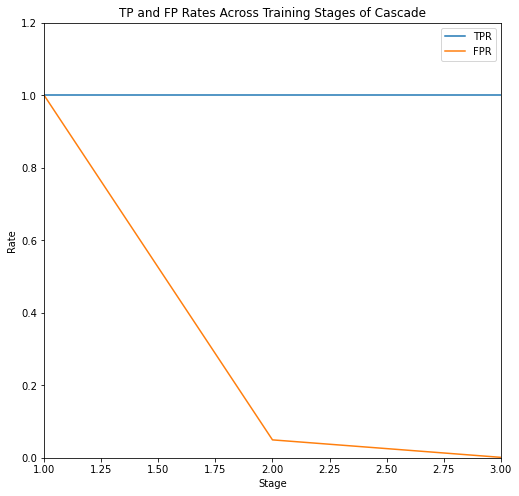

In [59]:
# fig_df = df[['Number of trees', 'Train R2 score', 'Test R2 score']]
fig_df = pd.melt(cascade_df, ['Stage'], var_name="",
                 value_name="Rate")

fig, ax = plt.subplots(figsize=(18, 8))

plt.subplot(121)
fig = sns.lineplot(data=fig_df, x='Stage', y='Rate', hue='')
fig.set(xlim=[1, 3], ylim=[0, 1.2])
fig.set_title("TP and FP Rates Across Training Stages of Cascade")

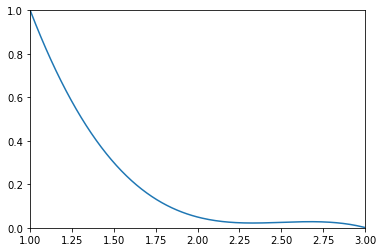

In [49]:
from scipy.interpolate import make_interp_spline, BSpline

x_new = np.linspace(0, 3, 300)
bspline = make_interp_spline(stages, fpr)
y_new = bspline(x_new)
plt.xlim(1, 3)
plt.ylim(0, 1)
plt.plot(x_new, y_new)